## Getting stock Beta with python

The Capital Asset Pricing Model (CAPM) equation:

\[
r_i = r_f + \beta_i (r_m - r_f)
\]

Where:
- \( r_i \) is the expected return on the asset.
- \( r_f \) is the risk-free rate.
- \( \beta_i \) is the asset's beta, representing its sensitivity to market movements.
- \( r_m \) is the expected return of the market portfolio.


In [71]:
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas_datareader.data as reader

In [72]:
end=dt.datetime.now()
start=dt.date(end.year-5,end.month,end.day)
Input=['MSFT','^GSPC']

In [73]:
df=yf.download(Input,start,end)['Adj Close']
df

[*********************100%%**********************]  2 of 2 completed


,MSFT,^GSPC
Date,,
2019-04-08,114.160454,2895.770020
2019-04-09,113.541702,2878.199951
2019-04-10,114.407936,2888.209961
2019-04-11,114.541214,2888.320068
2019-04-12,115.131363,2907.409912
...,...,...
2024-04-01,424.570007,5243.770020
2024-04-02,421.440002,5205.810059
2024-04-03,420.450012,5211.490234


## As we are interested in monthly returns 

In [74]:
mtl_ret=df.resample('M').ffill().pct_change()
mtl_ret=mtl_ret.dropna(axis=0)
mtl_ret.head()

,MSFT,^GSPC
Date,,
2019-05-31,-0.049481,-0.065778
2019-06-30,0.083118,0.068930
2019-07-31,0.017244,0.013128
2019-08-31,0.015037,-0.018092
2019-09-30,0.008487,0.017181


## Building regresion model

### Define dependent and independent variable

In [75]:
X=mtl_ret['^GSPC']
y=mtl_ret['MSFT']

X_sm=sm.add_constant(X)

In [76]:
model= sm.OLS(y,X_sm)

In [77]:
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     72.20
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           9.05e-12
Time:                        01:08:30   Log-Likelihood:                 106.20
No. Observations:                  60   AIC:                            -208.4
Df Residuals:                      58   BIC:                            -204.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.006      2.356      0.022       0.002       0.024
^GSPC          0.8760      0.103      8.497      0.000       0.670       1.082
==============================================================================
Omnibus:                        4.974   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.412
Skew:                           0.662   Prob(JB):                        0.110
Kurtosis:                       3.118   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets visualize

In [78]:
import seaborn as sns


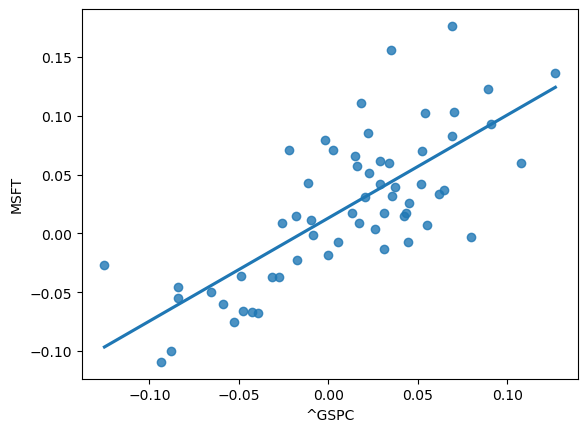

In [79]:
sns.regplot(x='^GSPC',y='MSFT',data=mtl_ret,ci=None)
plt.show()

## Now lets take risk free rate of return into consideraion

In [80]:
rf=reader.DataReader('F-F_research_Data_Factors','famafrench',start,end)[0].RF
rf.head()

Date
2019-04    0.21
2019-05    0.21
2019-06    0.18
2019-07    0.19
2019-08    0.16
Freq: M, Name: RF, dtype: float64

In [91]:
rf=rf[:-1]




## Lets substract the risk free rate to get 'Excess Return'

In [95]:
mtl_ret['MSFT-rf'],mtl_ret['^GSPC-rf']=mtl_ret['MSFT']-rf.values,mtl_ret['^GSPC']-rf.values
# mtl_ret=mtl_ret[:-2]

In [96]:
mtl_ret.head()

,MSFT,^GSPC,MSFT-rt,^GSPC-rf,MSFT-rf
Date,,,,,
2019-05-31,-0.049481,-0.065778,-0.259481,-0.275778,-0.259481
2019-06-30,0.083118,0.068930,-0.096882,-0.111070,-0.096882
2019-07-31,0.017244,0.013128,-0.172756,-0.176872,-0.172756
2019-08-31,0.015037,-0.018092,-0.144963,-0.178092,-0.144963
2019-09-30,0.008487,0.017181,-0.171513,-0.162819,-0.171513


## Building the regression model from above again

In [97]:
X=mtl_ret['^GSPC-rf']
y=mtl_ret['MSFT-rf']

In [98]:
X_sm=sm.add_constant(X)

In [99]:
model=sm.OLS(y,X_sm)

In [100]:
results=model.fit()

In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-rf   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     780.4
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.20e-33
Time:                        01:19:36   Log-Likelihood:                 96.859
No. Observations:                  55   AIC:                            -189.7
Df Residuals:                      53   BIC:                            -185.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.007      0.983      0.330      -0.007       0.022
^GSPC-rf       0.9547      0.034     27.936      0.000       0.886       1.023
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.501
Skew:                           0.517   Prob(JB):                        0.286
Kurtosis:                       3.150   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

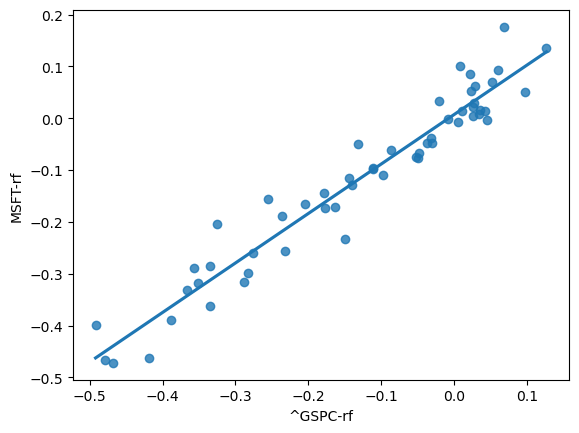

In [103]:
sns.regplot(x='^GSPC-rf',y='MSFT-rf',data=mtl_ret,ci=0)
plt.show()